In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

from dataloader import get_Dataframe, applyCut, applyCutsJets

import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.colors import LogNorm
from matplotlib import rc
from numpy import inf
from matplotlib import gridspec

import os

rc('text', usetex=True)

import matplotlib as mpl
rc('font', family='serif')
rc('text', usetex=True)
rc('font', size=22)
rc('xtick', labelsize=15)
rc('ytick', labelsize=15)
rc('legend', fontsize=15)

#
mpl.rcParams.update({'font.size': 19})
#mpl.rcParams.update({'legend.fontsize': 18})
mpl.rcParams.update({'xtick.labelsize': 18}) 
mpl.rcParams.update({'ytick.labelsize': 18}) 
mpl.rcParams.update({'text.usetex' : False})
mpl.rcParams.update({'axes.labelsize': 18}) 
mpl.rcParams.update({'legend.frameon': False}) 

import matplotlib.pyplot as plt
import mplhep as hep
#hep.set_style(hep.style.CMS)
hep.set_style("CMS") 

<ipython-input-1-7242005c437c>:44: FutureWarning: ``set_style`` is deprecated: Naming convention is changing to match mpl. Use ``mplhep.style.use()``.
  hep.set_style("CMS")


In [2]:
path = '/data1/bpnachman/hera/'

In [3]:
mc_names = ['Rapgap']
mc_tags = ['nominal']

data_tag  = 'nominal'
period = 'ep0607'

In [4]:
reload = False #need to set this to true once, then much faster the second time.

In [5]:
if (reload):
    data = get_Dataframe(path, name='Data', tag=data_tag, verbose=False)
    data = applyCutsJets(data,verbose=False)
    data.to_pickle("datafiles/data.pkl")
else:
    data = pd.read_pickle("datafiles/data.pkl")

In [6]:
if (reload):
    mc = get_Dataframe(path, name='Data', tag=data_tag, verbose=False)
    mc = applyCutsJets(data,verbose=False)
    mc.to_pickle("datafiles/Rapgap_nominal.pkl")
else:
    mc = pd.read_pickle("datafiles/Rapgap_nominal.pkl")

In [7]:
theta_unknown_S = data[['e_px','e_py','e_pz','jet_pt','jet_eta','jet_phi','jet_dphi','jet_qtnorm']].to_numpy()
theta0_S = mc[['e_px','e_py','e_pz','jet_pt','jet_eta','jet_phi','jet_dphi','jet_qtnorm']].to_numpy()
theta0_G = mc[['gene_px','gene_py','gene_pz','genjet_pt','genjet_eta','genjet_phi','genjet_dphi','genjet_qtnorm']].to_numpy()
weights_MC_sim = mc['wgt']
pass_reco = np.array(mc['pass_reco'])
pass_truth = np.array(mc['pass_truth'])
pass_fiducial = np.array(mc['pass_fiducial'])

In [8]:
bins = {}
dologx = [False,False,False,True]
dology = [True,False,True,True]

#jet pt
bins[0] = np.logspace(np.log10(10),np.log10(100),7)

#jet eta
bins[1] = np.linspace(-1,2.5,6)

#dphi
bins[2] = np.logspace(np.log10(0.03),np.log10(np.pi/2.0),9) - 0.03
bins[2] = bins[2][1:]
bins[2][0] = 0.0

#qt
bins[3] = np.logspace(np.log10(0.03),np.log10(3.03),9) - 0.03
bins[3] = bins[3][1:]
bins[3][0] = 0.0

<ipython-input-11-fa24c9a10f6d>:62: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_xticklabels(mylabs)
<ipython-input-11-fa24c9a10f6d>:63: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_yticklabels(mylabs)
<ipython-input-11-fa24c9a10f6d>:62: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_xticklabels(mylabs)
<ipython-input-11-fa24c9a10f6d>:63: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_yticklabels(mylabs)
<ipython-input-11-fa24c9a10f6d>:62: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_xticklabels(mylabs)
<ipython-input-11-fa24c9a10f6d>:63: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_yticklabels(mylabs)
<ipython-input-11-fa24c9a10f6d>:62: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_xticklabels(mylabs)
<ipython-inpu

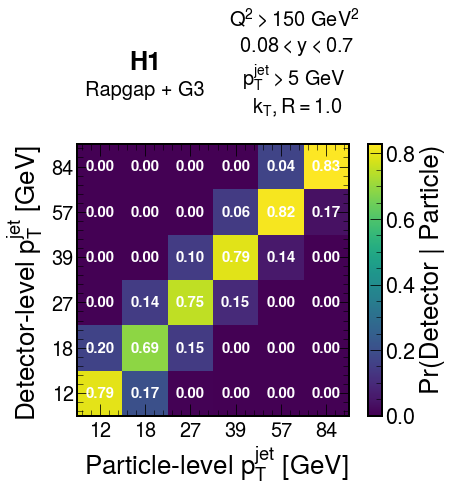

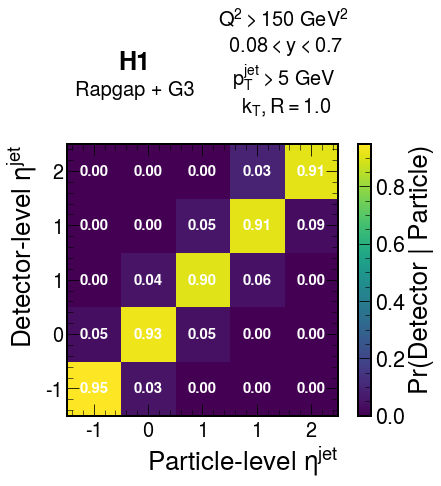

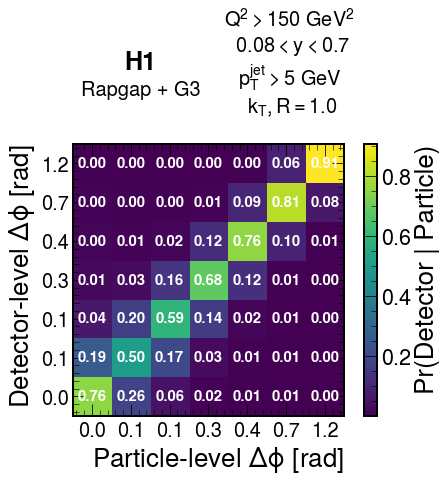

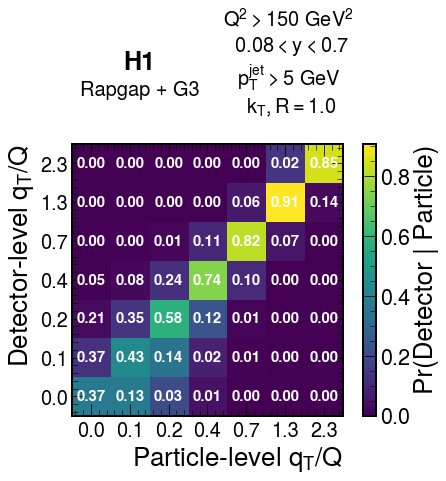

In [11]:
symbol = {}
symbol['dphi'] = '$\Delta\phi$ [rad]'
symbol['jeteta'] = '$\eta^{jet}$'
symbol['qt']  = '$q_{T}/Q$'
symbol['jetpt'] = '$p_{T}^{jet}$ [GeV]'
mylabels = ['jetpt','jeteta','dphi','qt']

mymap = {}
mymap[0] = 3
mymap[1] = 4
mymap[2] = 6
mymap[3] = 7

for j in range(4):

    fig = plt.figure(figsize=(7, 5)) 
    gs = gridspec.GridSpec(1, 1, height_ratios=[1]) 
    ax0 = plt.subplot(gs[0])
    ax0.yaxis.set_ticks_position('both')
    ax0.xaxis.set_ticks_position('both')
    ax0.tick_params(direction="in",which="both")
    ax0.minorticks_on()
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    
    H, xedges, yedges = np.histogram2d(theta0_G[(pass_reco==1)*(pass_truth==1)][:,mymap[j]],theta0_S[(pass_reco==1)*(pass_truth==1)][:,mymap[j]],bins=[bins[j],bins[j]])
    H_norm = H / H.sum(axis=1, keepdims=True)
    plt.imshow(H_norm,origin='lower',)
    cbar = plt.colorbar()
    cbar.ax.set_ylabel('Pr(Detector | Particle)') 

    for i in range(len(bins[j])-1):
        for j2 in range(len(bins[j])-1):
            plt.text(j2,i, "%0.2f" % H_norm.T[i,j2], 
                    color="w", ha="center", va="center", fontweight="bold",fontsize=15)

    #plt.xscale("log")
    #plt.yscale("log")

    plt.text(0.25, 1.3,'H1',
                  horizontalalignment='center',
         verticalalignment='center',
         transform = ax0.transAxes, fontsize=25, fontweight='bold')
    plt.text(0.25, 1.2,'Rapgap + G3',
                  horizontalalignment='center',
         verticalalignment='center',
         transform = ax0.transAxes, fontsize=20)
    plt.text(0.8, 1.3,'$Q^{2}>$150 GeV$^{2}$ \n $0.08<y<0.7$ \n $p_{T}^{jet}>5$ GeV  \n $k_{T}, R=1.0$',
         horizontalalignment='center',
         verticalalignment='center',
         transform = ax0.transAxes, fontsize=20)    

    plt.ylabel("Detector-level "+symbol[mylabels[j]])
    plt.xlabel("Particle-level "+symbol[mylabels[j]])
    mylabs = [""]
    if (j<2):
        for i in range(len(bins[j])-1):
            mylabs+=["%0.0f" % (0.5*(bins[j][i]+bins[j][i+1]))]
    else:
        for i in range(len(bins[j])-1):
            mylabs+=["%0.1f" % (0.5*(bins[j][i]+bins[j][i+1]))]
    ax0.set_xticklabels(mylabs)
    ax0.set_yticklabels(mylabs)
    ax0.xaxis.set_major_locator(plt.MaxNLocator(len(bins[j])))
    ax0.yaxis.set_major_locator(plt.MaxNLocator(len(bins[j])))

    fig.savefig('figures/Response_%s.pdf'%mylabels[j],bbox_inches='tight')

In [10]:
#Covariance matrix.

In [11]:
unfolded_vals = {}
for i in range(4):
    for j in range(7):
        unfolded_vals[j,i] = np.load("outputfiles/unfolded_histos_o"+str(i)+"_s"+str(j)+".npy")

In [12]:
#QED
qedcorr_rapgap = {}
qedcorr_djangoh = {} 
with open('outputfiles/QEDCorrections_Rapgap.npy' , 'rb') as f:
    qedcorr_rapgap['jetpt'] = np.load(f)
    qedcorr_rapgap['jeteta'] = np.load(f)
    qedcorr_rapgap['qt'] = np.load(f)
    qedcorr_rapgap['dphi'] = np.load(f)
with open('outputfiles/QEDCorrections_Djangoh.npy' , 'rb') as f:
    qedcorr_djangoh['jetpt'] = np.load(f)
    qedcorr_djangoh['jeteta'] = np.load(f)
    qedcorr_djangoh['qt'] = np.load(f)
    qedcorr_djangoh['dphi'] = np.load(f)

In [13]:
#Non-closure
unfolded_vals_nonclosure = {}
for i in range(4):
    for j in range(7,9):
        unfolded_vals_nonclosure[j,i] = np.load("outputfiles/non_closure_histos_o"+str(i)+"_s"+str(j)+".npy")

In [14]:
#Stat uncert.
unfolded_vals_bootstraps = {}
for i in range(4):
    for j in range(1,100):
        unfolded_vals_bootstraps[j,i] = np.load("outputfiles/boostrapuncerts_unfolded_histos_o"+str(i)+"_s"+str(j)+".npy")

<ipython-input-15-5cadd1b22e8b>:65: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_xticklabels(mylabs)
<ipython-input-15-5cadd1b22e8b>:66: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_yticklabels(mylabs)
<ipython-input-15-5cadd1b22e8b>:65: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_xticklabels(mylabs)
<ipython-input-15-5cadd1b22e8b>:66: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_yticklabels(mylabs)
<ipython-input-15-5cadd1b22e8b>:65: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_xticklabels(mylabs)
<ipython-input-15-5cadd1b22e8b>:66: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_yticklabels(mylabs)
<ipython-input-15-5cadd1b22e8b>:65: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_xticklabels(mylabs)
<ipython-inpu

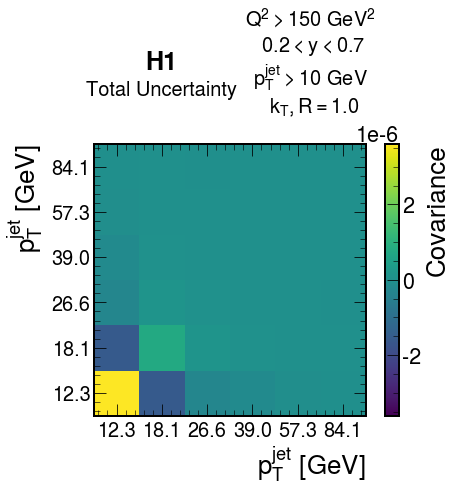

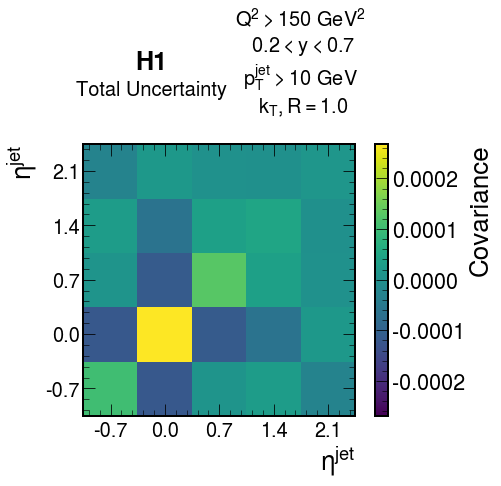

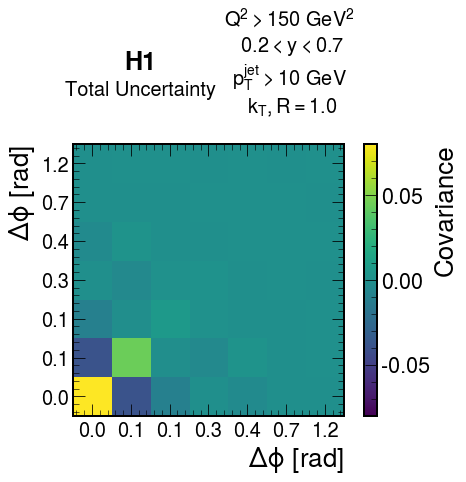

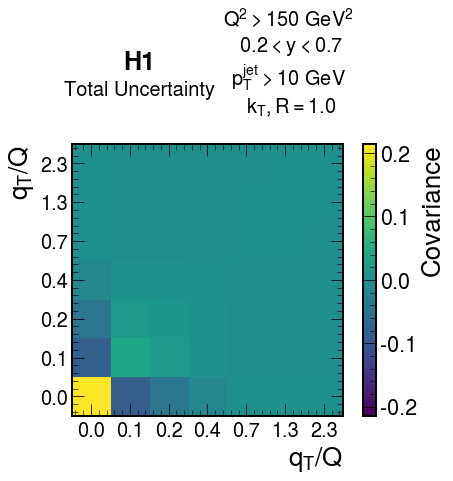

In [15]:
for jj in range(4):

    cov_mat = np.zeros([len(bins[jj])-1,len(bins[jj])-1])
    for i in range(len(bins[jj])-1):
        for j in range(len(bins[jj])-1):
            for k in range(7):
                sigmai = (unfolded_vals[0,jj]-unfolded_vals[k,jj])[i]
                sigmaj = (unfolded_vals[0,jj]-unfolded_vals[k,jj])[j]
                cov_mat[i,j]+=sigmai*sigmaj
            
            #QED
            sigmai = unfolded_vals[0,jj][i]*(1.-qedcorr_rapgap[mylabels[jj]][i]/qedcorr_djangoh[mylabels[jj]][i])
            sigmaj = unfolded_vals[0,jj][j]*(1.-qedcorr_rapgap[mylabels[jj]][j]/qedcorr_djangoh[mylabels[jj]][j])
            cov_mat[i,j]+=sigmai*sigmaj
            
            #Non-closure
            sigmai = unfolded_vals_nonclosure[8,jj][i]-unfolded_vals_nonclosure[7,jj][i]
            sigmaj = unfolded_vals_nonclosure[8,jj][j]-unfolded_vals_nonclosure[7,jj][j]
            cov_mat[i,j]+=sigmai*sigmaj
            
            #Stat. uncert
            EX = np.mean(np.array([unfolded_vals_bootstraps[ii,jj] for ii in range(1,100)])[:,i])
            EY = np.mean(np.array([unfolded_vals_bootstraps[ii,jj] for ii in range(1,100)])[:,j])
            EXY = np.mean(np.array(np.array([unfolded_vals_bootstraps[ii,jj] for ii in range(1,100)])[:,i]*np.array([unfolded_vals_bootstraps[ii,jj] for ii in range(1,100)])[:,j]))
            cov_mat[i,j]+=EXY-EX*EY
            
    cov_mat = np.array(cov_mat)

    fig = plt.figure(figsize=(7, 5)) 
    gs = gridspec.GridSpec(1, 1, height_ratios=[1]) 
    ax0 = plt.subplot(gs[0])
    ax0.yaxis.set_ticks_position('both')
    ax0.xaxis.set_ticks_position('both')
    ax0.tick_params(direction="in",which="both")
    ax0.minorticks_on()
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    plt.imshow(cov_mat,vmin = -np.max(cov_mat.flatten()),vmax = np.max(cov_mat.flatten()),origin='lower',)
    cbar = plt.colorbar()
    cbar.ax.set_ylabel('Covariance') 
    
    plt.text(0.25, 1.3,'H1',
                  horizontalalignment='center',
         verticalalignment='center',
         transform = ax0.transAxes, fontsize=25, fontweight='bold')
    plt.text(0.25, 1.2,'Total Uncertainty',
                  horizontalalignment='center',
         verticalalignment='center',
         transform = ax0.transAxes, fontsize=20)
    plt.text(0.8, 1.3,'$Q^{2}>$150 GeV$^{2}$ \n $0.2<y<0.7$ \n $p_{T}^{jet}>10$ GeV  \n $k_{T}, R=1.0$',
         horizontalalignment='center',
         verticalalignment='center',
         transform = ax0.transAxes, fontsize=20)   

    plt.ylabel(symbol[mylabels[jj]])
    plt.xlabel(symbol[mylabels[jj]])
    mylabs = [""]
    if (j<2):
        for i in range(len(bins[jj])-1):
            mylabs+=["%0.0f" % (0.5*(bins[jj][i]+bins[jj][i+1]))]
    else:
        for i in range(len(bins[jj])-1):
            mylabs+=["%0.1f" % (0.5*(bins[jj][i]+bins[jj][i+1]))]
    ax0.set_xticklabels(mylabs)
    ax0.set_yticklabels(mylabs)
    ax0.xaxis.set_major_locator(plt.MaxNLocator(len(bins[jj])))
    ax0.yaxis.set_major_locator(plt.MaxNLocator(len(bins[jj])))
    
    fig.savefig('figures/CovMat_%s.pdf'%mylabels[jj],bbox_inches='tight')

<ipython-input-16-a7d32361278f>:69: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_xticklabels(mylabs)
<ipython-input-16-a7d32361278f>:70: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_yticklabels(mylabs)
<ipython-input-16-a7d32361278f>:69: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_xticklabels(mylabs)
<ipython-input-16-a7d32361278f>:70: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_yticklabels(mylabs)
<ipython-input-16-a7d32361278f>:69: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_xticklabels(mylabs)
<ipython-input-16-a7d32361278f>:70: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_yticklabels(mylabs)
<ipython-input-16-a7d32361278f>:69: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_xticklabels(mylabs)
<ipython-inpu

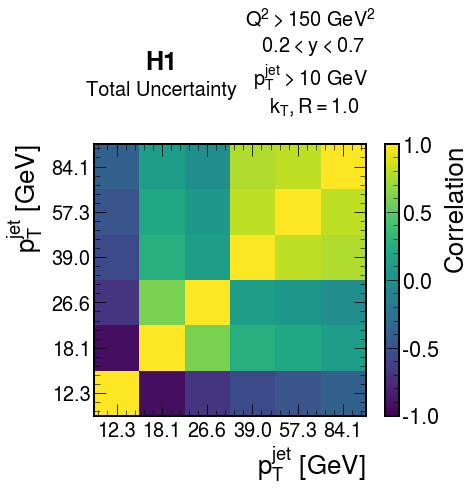

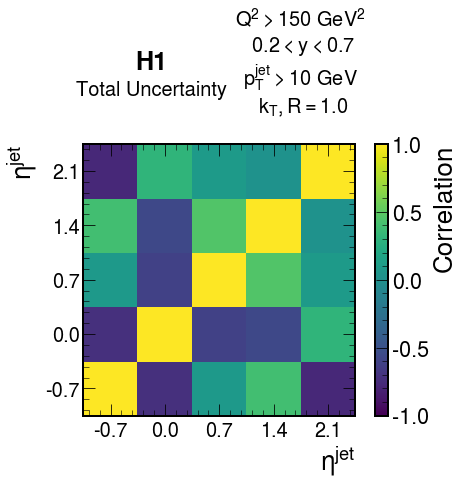

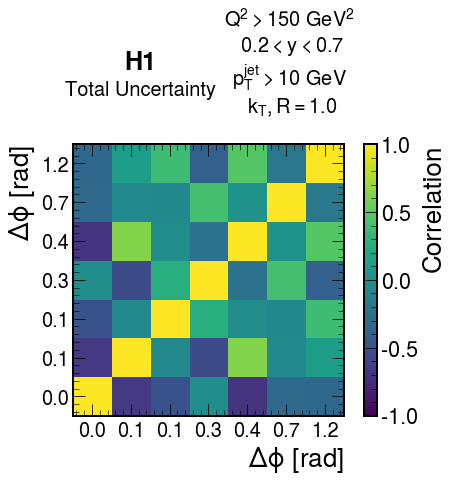

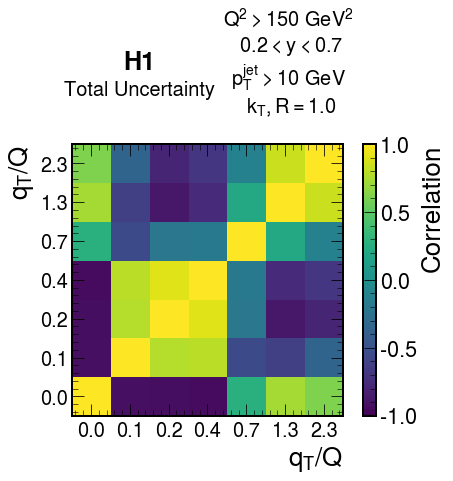

In [16]:
for jj in range(4):

    cov_mat = np.zeros([len(bins[jj])-1,len(bins[jj])-1])
    for i in range(len(bins[jj])-1):
        for j in range(len(bins[jj])-1):
            for k in range(7):
                sigmai = (unfolded_vals[0,jj]-unfolded_vals[k,jj])[i]
                sigmaj = (unfolded_vals[0,jj]-unfolded_vals[k,jj])[j]
                cov_mat[i,j]+=sigmai*sigmaj
            
            #QED
            sigmai = unfolded_vals[0,jj][i]*(1.-qedcorr_rapgap[mylabels[jj]][i]/qedcorr_djangoh[mylabels[jj]][i])
            sigmaj = unfolded_vals[0,jj][j]*(1.-qedcorr_rapgap[mylabels[jj]][j]/qedcorr_djangoh[mylabels[jj]][j])
            cov_mat[i,j]+=sigmai*sigmaj
            
            #Non-closure
            sigmai = unfolded_vals_nonclosure[8,jj][i]-unfolded_vals_nonclosure[7,jj][i]
            sigmaj = unfolded_vals_nonclosure[8,jj][j]-unfolded_vals_nonclosure[7,jj][j]
            cov_mat[i,j]+=sigmai*sigmaj
            
            #Stat. uncert
            EX = np.mean(np.array([unfolded_vals_bootstraps[ii,jj] for ii in range(1,100)])[:,i])
            EY = np.mean(np.array([unfolded_vals_bootstraps[ii,jj] for ii in range(1,100)])[:,j])
            EXY = np.mean(np.array(np.array([unfolded_vals_bootstraps[ii,jj] for ii in range(1,100)])[:,i]*np.array([unfolded_vals_bootstraps[ii,jj] for ii in range(1,100)])[:,j]))
            cov_mat[i,j]+=EXY-EX*EY
            
    cov_mat = np.array(cov_mat)
    cor_mat = cov_mat.copy()
    for i in range(len(bins[jj])-1):
        for j in range(len(bins[jj])-1):
            cor_mat[i,j]=cov_mat[i,j]/(cov_mat[i,i]*cov_mat[j,j])**0.5

    fig = plt.figure(figsize=(7, 5)) 
    gs = gridspec.GridSpec(1, 1, height_ratios=[1]) 
    ax0 = plt.subplot(gs[0])
    ax0.yaxis.set_ticks_position('both')
    ax0.xaxis.set_ticks_position('both')
    ax0.tick_params(direction="in",which="both")
    ax0.minorticks_on()
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    plt.imshow(cor_mat,vmin = -1,vmax = 1,origin='lower',)
    cbar = plt.colorbar()
    cbar.ax.set_ylabel('Correlation') 
    
    plt.text(0.25, 1.3,'H1',
                  horizontalalignment='center',
         verticalalignment='center',
         transform = ax0.transAxes, fontsize=25, fontweight='bold')
    plt.text(0.25, 1.2,'Total Uncertainty',
                  horizontalalignment='center',
         verticalalignment='center',
         transform = ax0.transAxes, fontsize=20)
    plt.text(0.8, 1.3,'$Q^{2}>$150 GeV$^{2}$ \n $0.2<y<0.7$ \n $p_{T}^{jet}>10$ GeV  \n $k_{T}, R=1.0$',
         horizontalalignment='center',
         verticalalignment='center',
         transform = ax0.transAxes, fontsize=20)   

    plt.ylabel(symbol[mylabels[jj]])
    plt.xlabel(symbol[mylabels[jj]])
    mylabs = [""]
    if (j<2):
        for i in range(len(bins[jj])-1):
            mylabs+=["%0.0f" % (0.5*(bins[jj][i]+bins[jj][i+1]))]
    else:
        for i in range(len(bins[jj])-1):
            mylabs+=["%0.1f" % (0.5*(bins[jj][i]+bins[jj][i+1]))]
    ax0.set_xticklabels(mylabs)
    ax0.set_yticklabels(mylabs)
    ax0.xaxis.set_major_locator(plt.MaxNLocator(len(bins[jj])))
    ax0.yaxis.set_major_locator(plt.MaxNLocator(len(bins[jj])))
    
    fig.savefig('figures/CorMat_%s.pdf'%mylabels[jj],bbox_inches='tight')

<ipython-input-19-fd31de477909>:69: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_xticklabels(mylabs)
<ipython-input-19-fd31de477909>:70: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_yticklabels(mylabs)
<ipython-input-19-fd31de477909>:69: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_xticklabels(mylabs)
<ipython-input-19-fd31de477909>:70: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_yticklabels(mylabs)
<ipython-input-19-fd31de477909>:69: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_xticklabels(mylabs)
<ipython-input-19-fd31de477909>:70: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_yticklabels(mylabs)
<ipython-input-19-fd31de477909>:69: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_xticklabels(mylabs)
<ipython-inpu

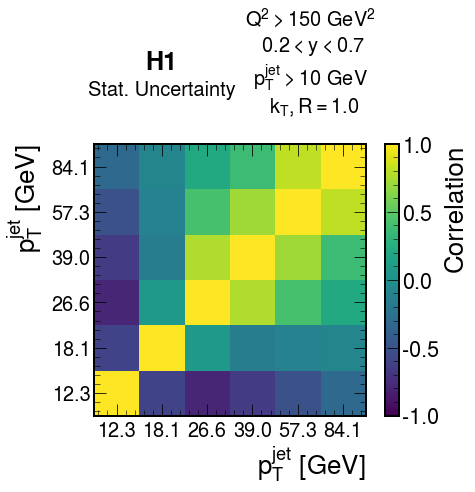

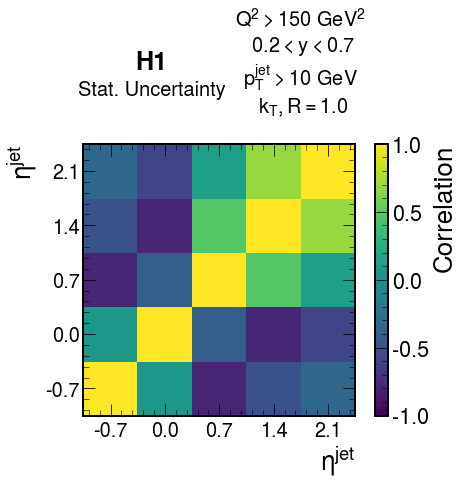

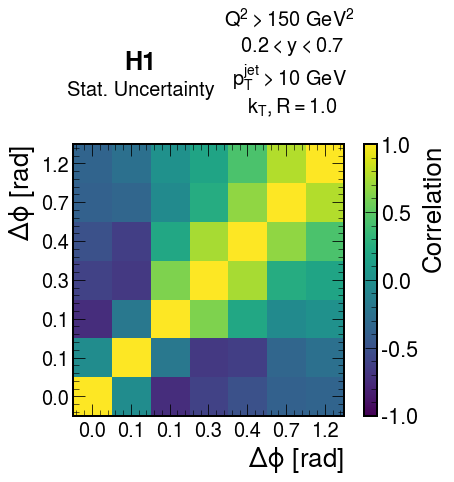

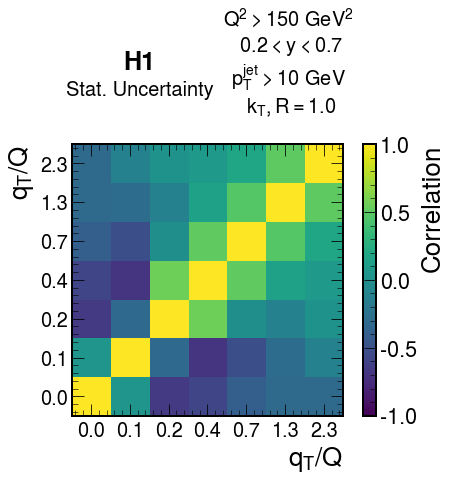

In [19]:
for jj in range(4):

    cov_mat = np.zeros([len(bins[jj])-1,len(bins[jj])-1])
    for i in range(len(bins[jj])-1):
        for j in range(len(bins[jj])-1):
            for k in range(7):
                sigmai = (unfolded_vals[0,jj]-unfolded_vals[k,jj])[i]
                sigmaj = (unfolded_vals[0,jj]-unfolded_vals[k,jj])[j]
                #cov_mat[i,j]+=sigmai*sigmaj
            
            #QED
            sigmai = unfolded_vals[0,jj][i]*(1.-qedcorr_rapgap[mylabels[jj]][i]/qedcorr_djangoh[mylabels[jj]][i])
            sigmaj = unfolded_vals[0,jj][j]*(1.-qedcorr_rapgap[mylabels[jj]][j]/qedcorr_djangoh[mylabels[jj]][j])
            #cov_mat[i,j]+=sigmai*sigmaj
            
            #Non-closure
            sigmai = unfolded_vals_nonclosure[8,jj][i]-unfolded_vals_nonclosure[7,jj][i]
            sigmaj = unfolded_vals_nonclosure[8,jj][j]-unfolded_vals_nonclosure[7,jj][j]
            #cov_mat[i,j]+=sigmai*sigmaj
            
            #Stat. uncert
            EX = np.mean(np.array([unfolded_vals_bootstraps[ii,jj] for ii in range(1,100)])[:,i])
            EY = np.mean(np.array([unfolded_vals_bootstraps[ii,jj] for ii in range(1,100)])[:,j])
            EXY = np.mean(np.array(np.array([unfolded_vals_bootstraps[ii,jj] for ii in range(1,100)])[:,i]*np.array([unfolded_vals_bootstraps[ii,jj] for ii in range(1,100)])[:,j]))
            cov_mat[i,j]+=EXY-EX*EY
            
    cov_mat = np.array(cov_mat)
    cor_mat = cov_mat.copy()
    for i in range(len(bins[jj])-1):
        for j in range(len(bins[jj])-1):
            cor_mat[i,j]=cov_mat[i,j]/(cov_mat[i,i]*cov_mat[j,j])**0.5

    fig = plt.figure(figsize=(7, 5)) 
    gs = gridspec.GridSpec(1, 1, height_ratios=[1]) 
    ax0 = plt.subplot(gs[0])
    ax0.yaxis.set_ticks_position('both')
    ax0.xaxis.set_ticks_position('both')
    ax0.tick_params(direction="in",which="both")
    ax0.minorticks_on()
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    plt.imshow(cor_mat,vmin = -1,vmax = 1,origin='lower')
    cbar = plt.colorbar()
    cbar.ax.set_ylabel('Correlation') 
    
    plt.text(0.25, 1.3,'H1',
                  horizontalalignment='center',
         verticalalignment='center',
         transform = ax0.transAxes, fontsize=25, fontweight='bold')
    plt.text(0.25, 1.2,'Stat. Uncertainty',
                  horizontalalignment='center',
         verticalalignment='center',
         transform = ax0.transAxes, fontsize=20)
    plt.text(0.8, 1.3,'$Q^{2}>$150 GeV$^{2}$ \n $0.2<y<0.7$ \n $p_{T}^{jet}>10$ GeV  \n $k_{T}, R=1.0$',
         horizontalalignment='center',
         verticalalignment='center',
         transform = ax0.transAxes, fontsize=20)   

    plt.ylabel(symbol[mylabels[jj]])
    plt.xlabel(symbol[mylabels[jj]])
    mylabs = [""]
    if (j<2):
        for i in range(len(bins[jj])-1):
            mylabs+=["%0.0f" % (0.5*(bins[jj][i]+bins[jj][i+1]))]
    else:
        for i in range(len(bins[jj])-1):
            mylabs+=["%0.1f" % (0.5*(bins[jj][i]+bins[jj][i+1]))]
    ax0.set_xticklabels(mylabs)
    ax0.set_yticklabels(mylabs)
    ax0.xaxis.set_major_locator(plt.MaxNLocator(len(bins[jj])))
    ax0.yaxis.set_major_locator(plt.MaxNLocator(len(bins[jj])))
    
    fig.savefig('figures/CorStatMat_%s.pdf'%mylabels[jj],bbox_inches='tight')

In [77]:
#What if we compute a "pure" stat part with no initialization confusion.

#Now, let's average the weights.
unfolded_vals = {}
    
#Load files
mc_name = mc_names[0]
mc_tag = mc_tags[0]

mc = pd.read_pickle("datafiles/"+mc_name+"_"+mc_tag+".pkl")
pass_reco = np.array(mc['pass_reco'])
pass_truth = np.array(mc['pass_truth'])
pass_fiducial = np.array(mc['pass_fiducial'])
ww = np.load(mc_name+"_"+mc_tag+".npy")

theta0_G = mc[['genjet_pt','genjet_eta','genjet_dphi','genjet_qtnorm']].to_numpy()
weights_MC_sim = mc['wgt']

for bootstrap in range(1000):
    if (bootstrap%10==0):
        print("on bootstrap:",bootstrap)
    myrand = np.random.poisson(1,len(ww[pass_fiducial==1]))
    for i in range(4):
        unfolded_vals[bootstrap,i],_ = np.histogram(theta0_G[pass_fiducial==1][:,i],bins=bins[i],weights=ww[pass_fiducial==1]*myrand,density=True)

on bootstrap: 0
on bootstrap: 10
on bootstrap: 20
on bootstrap: 30
on bootstrap: 40
on bootstrap: 50
on bootstrap: 60
on bootstrap: 70
on bootstrap: 80
on bootstrap: 90
on bootstrap: 100
on bootstrap: 110
on bootstrap: 120
on bootstrap: 130
on bootstrap: 140
on bootstrap: 150
on bootstrap: 160
on bootstrap: 170
on bootstrap: 180
on bootstrap: 190
on bootstrap: 200
on bootstrap: 210
on bootstrap: 220
on bootstrap: 230
on bootstrap: 240
on bootstrap: 250
on bootstrap: 260
on bootstrap: 270
on bootstrap: 280
on bootstrap: 290
on bootstrap: 300
on bootstrap: 310
on bootstrap: 320
on bootstrap: 330
on bootstrap: 340
on bootstrap: 350
on bootstrap: 360
on bootstrap: 370
on bootstrap: 380
on bootstrap: 390
on bootstrap: 400
on bootstrap: 410
on bootstrap: 420
on bootstrap: 430
on bootstrap: 440
on bootstrap: 450
on bootstrap: 460
on bootstrap: 470
on bootstrap: 480
on bootstrap: 490
on bootstrap: 500
on bootstrap: 510
on bootstrap: 520
on bootstrap: 530
on bootstrap: 540
on bootstrap: 550
on 

<ipython-input-29-2e833a2451e7>:54: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_xticklabels(mylabs)
<ipython-input-29-2e833a2451e7>:55: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_yticklabels(mylabs)
<ipython-input-29-2e833a2451e7>:54: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_xticklabels(mylabs)
<ipython-input-29-2e833a2451e7>:55: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_yticklabels(mylabs)
<ipython-input-29-2e833a2451e7>:54: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_xticklabels(mylabs)
<ipython-input-29-2e833a2451e7>:55: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_yticklabels(mylabs)
<ipython-input-29-2e833a2451e7>:54: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_xticklabels(mylabs)
<ipython-inpu

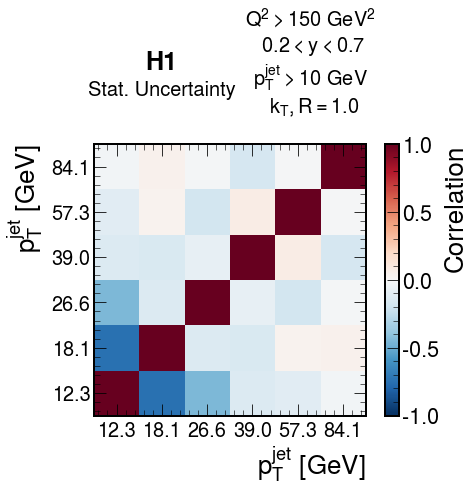

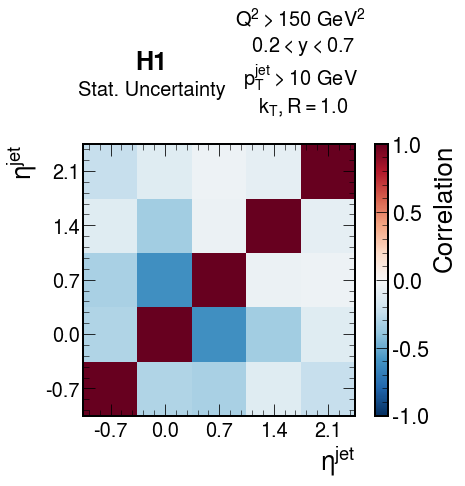

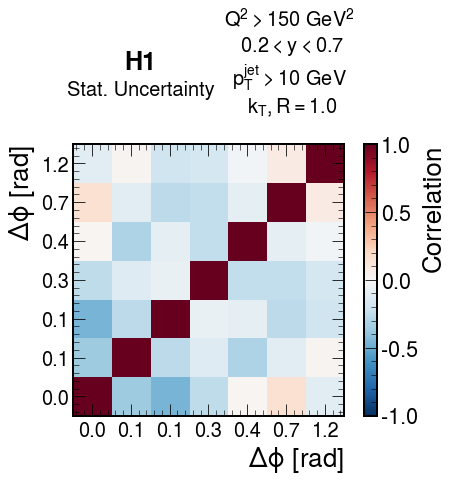

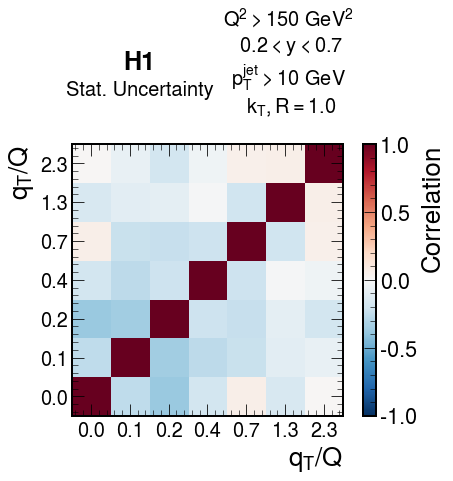

In [29]:
for jj in range(4):

    cov_mat = np.zeros([len(bins[jj])-1,len(bins[jj])-1])
    for i in range(len(bins[jj])-1):
            for j in range(len(bins[jj])-1):
                #Stat. uncert
                EX = np.mean(np.array([unfolded_vals[ii,jj] for ii in range(1,100)])[:,i])
                EY = np.mean(np.array([unfolded_vals[ii,jj] for ii in range(1,100)])[:,j])
                EXY = np.mean(np.array(np.array([unfolded_vals[ii,jj] for ii in range(1,100)])[:,i]*np.array([unfolded_vals[ii,jj] for ii in range(1,100)])[:,j]))
                cov_mat[i,j]+=EXY-EX*EY
            
    cov_mat = np.array(cov_mat)
    cor_mat = cov_mat.copy()
    for i in range(len(bins[jj])-1):
        for j in range(len(bins[jj])-1):
            cor_mat[i,j]=cov_mat[i,j]/(cov_mat[i,i]*cov_mat[j,j])**0.5

    fig = plt.figure(figsize=(7, 5)) 
    gs = gridspec.GridSpec(1, 1, height_ratios=[1]) 
    ax0 = plt.subplot(gs[0])
    ax0.yaxis.set_ticks_position('both')
    ax0.xaxis.set_ticks_position('both')
    ax0.tick_params(direction="in",which="both")
    ax0.minorticks_on()
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    plt.imshow(cor_mat,vmin = -1,vmax = 1,origin='lower',cmap="RdBu_r")
    cbar = plt.colorbar()
    cbar.ax.set_ylabel('Correlation') 
    
    plt.text(0.25, 1.3,'H1',
                  horizontalalignment='center',
         verticalalignment='center',
         transform = ax0.transAxes, fontsize=25, fontweight='bold')
    plt.text(0.25, 1.2,'Stat. Uncertainty',
                  horizontalalignment='center',
         verticalalignment='center',
         transform = ax0.transAxes, fontsize=20)
    plt.text(0.8, 1.3,'$Q^{2}>$150 GeV$^{2}$ \n $0.2<y<0.7$ \n $p_{T}^{jet}>10$ GeV  \n $k_{T}, R=1.0$',
         horizontalalignment='center',
         verticalalignment='center',
         transform = ax0.transAxes, fontsize=20)   

    plt.ylabel(symbol[mylabels[jj]])
    plt.xlabel(symbol[mylabels[jj]])
    mylabs = [""]
    if (j<2):
        for i in range(len(bins[jj])-1):
            mylabs+=["%0.0f" % (0.5*(bins[jj][i]+bins[jj][i+1]))]
    else:
        for i in range(len(bins[jj])-1):
            mylabs+=["%0.1f" % (0.5*(bins[jj][i]+bins[jj][i+1]))]
    ax0.set_xticklabels(mylabs)
    ax0.set_yticklabels(mylabs)
    ax0.xaxis.set_major_locator(plt.MaxNLocator(len(bins[jj])))
    ax0.yaxis.set_major_locator(plt.MaxNLocator(len(bins[jj])))
    
    fig.savefig('figures/CorStatMat_%s.pdf'%mylabels[jj],bbox_inches='tight')

<ipython-input-79-bb880e97b8e6>:72: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_xticklabels(mylabs)
<ipython-input-79-bb880e97b8e6>:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_yticklabels(mylabs)


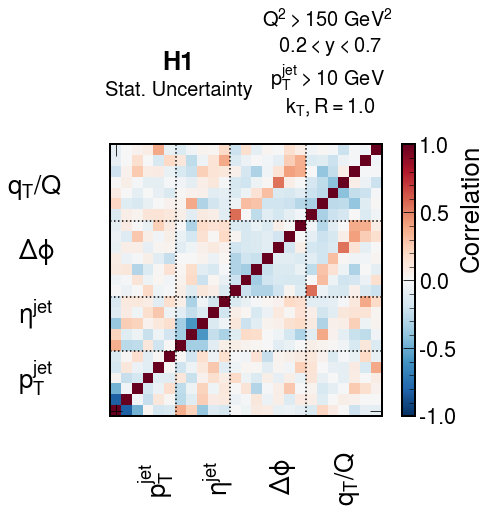

In [79]:
#make a mega correlation matrix?

firststrap = np.concatenate([unfolded_vals[0,0],unfolded_vals[0,1],unfolded_vals[0,2],unfolded_vals[0,3]])
cov_mat = np.zeros([len(firststrap),len(firststrap)])
for i in range(len(firststrap)):
    for j in range(len(firststrap)):
        #Stat. uncert
        EX = np.mean(np.array([np.concatenate([unfolded_vals[ii,0],unfolded_vals[ii,1],unfolded_vals[ii,2],unfolded_vals[ii,3]]) for ii in range(1,100)])[:,i])
        EY = np.mean(np.array([np.concatenate([unfolded_vals[ii,0],unfolded_vals[ii,1],unfolded_vals[ii,2],unfolded_vals[ii,3]]) for ii in range(1,100)])[:,j])
        EXY = np.mean(np.array([np.concatenate([unfolded_vals[ii,0],unfolded_vals[ii,1],unfolded_vals[ii,2],unfolded_vals[ii,3]]) for ii in range(1,100)])[:,i]*np.array([np.concatenate([unfolded_vals[ii,0],unfolded_vals[ii,1],unfolded_vals[ii,2],unfolded_vals[ii,3]]) for ii in range(1,100)])[:,j])
        cov_mat[i,j]+=EXY-EX*EY
            
cov_mat = np.array(cov_mat)
cor_mat = cov_mat.copy()
for i in range(len(firststrap)):
    for j in range(len(firststrap)):
        cor_mat[i,j]=cov_mat[i,j]/(cov_mat[i,i]*cov_mat[j,j])**0.5

fig = plt.figure(figsize=(7, 5)) 
gs = gridspec.GridSpec(1, 1, height_ratios=[1]) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
ax0.minorticks_on()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.imshow(cor_mat,vmin = -1,vmax = 1,origin='lower',cmap="RdBu_r")
cbar = plt.colorbar()
cbar.ax.set_ylabel('Correlation') 

plt.text(0.25, 1.3,'H1',
              horizontalalignment='center',
     verticalalignment='center',
     transform = ax0.transAxes, fontsize=25, fontweight='bold')
plt.text(0.25, 1.2,'Stat. Uncertainty',
              horizontalalignment='center',
     verticalalignment='center',
     transform = ax0.transAxes, fontsize=20)
plt.text(0.8, 1.3,'$Q^{2}>$150 GeV$^{2}$ \n $0.2<y<0.7$ \n $p_{T}^{jet}>10$ GeV  \n $k_{T}, R=1.0$',
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax0.transAxes, fontsize=20)   

#plt.ylabel("bin")
#plt.xlabel("bin")

plt.text(2,-7,"$p_T^{jet}$", rotation=90)
plt.text(8,-7,"$\eta^{jet}$", rotation=90)
plt.text(14,-7,"$\Delta\phi$", rotation=90)
plt.text(20,-8,"$q_T/Q$", rotation=90)

plt.text(-9,2,"$p_T^{jet}$")
plt.text(-9,8,"$\eta^{jet}$")
plt.text(-9,14,"$\Delta\phi$")
plt.text(-10,20,"$q_T/Q$")

mysum = 0
for i in range(4):
    mysum+=len(unfolded_vals[0,i])
    plt.axvline(mysum-0.5,color="black",ls=":")
    plt.axhline(mysum-0.5,color="black",ls=":")

mylabs = [""]
if (j<2):
    for i in range(len(bins[jj])-1):
        mylabs+=["%0.0f" % (0.5*(bins[jj][i]+bins[jj][i+1]))]
else:
    for i in range(len(bins[jj])-1):
        mylabs+=["%0.1f" % (0.5*(bins[jj][i]+bins[jj][i+1]))]
ax0.set_xticklabels(mylabs)
ax0.set_yticklabels(mylabs)
ax0.xaxis.set_major_locator(plt.MaxNLocator(len(bins[jj])))
ax0.yaxis.set_major_locator(plt.MaxNLocator(len(bins[jj])))
plt.xticks([0],[""], rotation='vertical')
plt.yticks([0],[""], rotation='vertical')

fig.savefig('figures/CorStatMat_all.pdf',bbox_inches='tight')

In [20]:
#Stat uncert.
unfolded_vals_bootstraps_other = {}
for k in range(5):
    for i in range(4):
        for j in range(1,100):
            unfolded_vals_bootstraps_other[k,j,i] = np.load("outputfiles/boostrapuncerts_other_unfolded_histos_o"+str(i)+"_s"+str(j)+"_i"+str(k)+".npy")

<ipython-input-23-d3a2e50bc50b>:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_xticklabels(mylabs)
<ipython-input-23-d3a2e50bc50b>:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_yticklabels(mylabs)
<ipython-input-23-d3a2e50bc50b>:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_xticklabels(mylabs)
<ipython-input-23-d3a2e50bc50b>:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_yticklabels(mylabs)
<ipython-input-23-d3a2e50bc50b>:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_xticklabels(mylabs)
<ipython-input-23-d3a2e50bc50b>:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_yticklabels(mylabs)
<ipython-input-23-d3a2e50bc50b>:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_xticklabels(mylabs)
<ipython-inpu

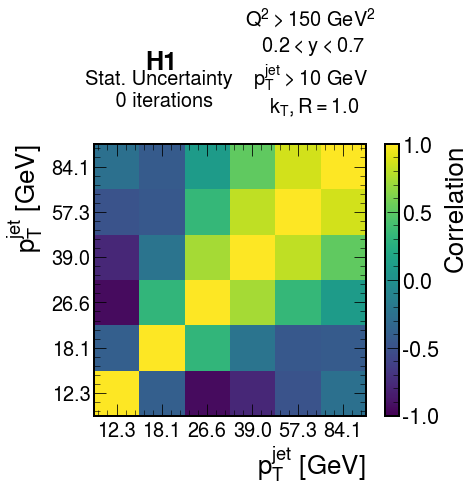

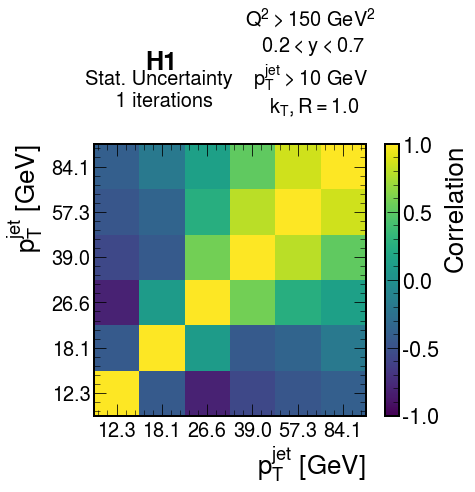

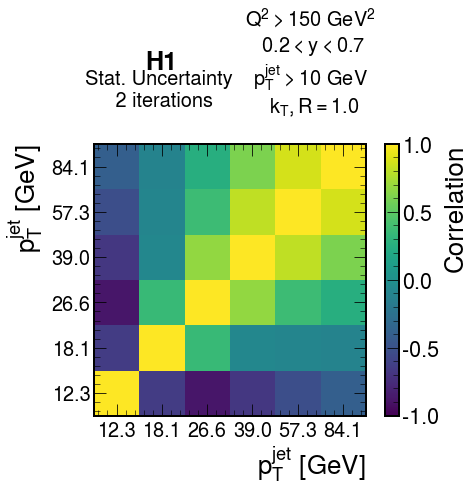

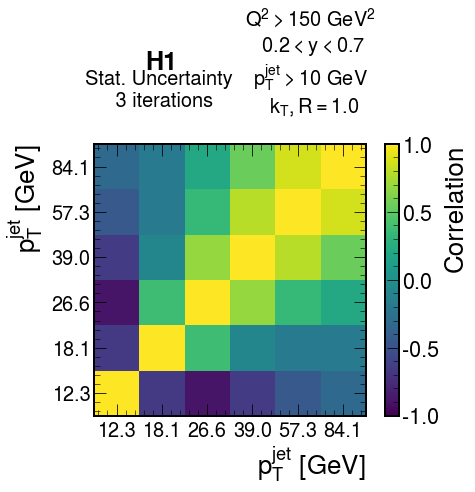

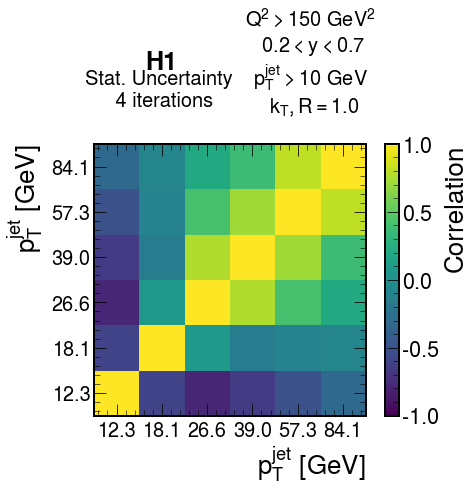

In [23]:
for myiter in range(5):
    for jj in [0]: #range(4):

        cov_mat = np.zeros([len(bins[jj])-1,len(bins[jj])-1])
        for i in range(len(bins[jj])-1):
            for j in range(len(bins[jj])-1):

                #Stat. uncert
                EX = np.mean(np.array([unfolded_vals_bootstraps_other[myiter,ii,jj] for ii in range(1,100)])[:,i])
                EY = np.mean(np.array([unfolded_vals_bootstraps_other[myiter,ii,jj] for ii in range(1,100)])[:,j])
                EXY = np.mean(np.array(np.array([unfolded_vals_bootstraps_other[myiter,ii,jj] for ii in range(1,100)])[:,i]*np.array([unfolded_vals_bootstraps_other[myiter,ii,jj] for ii in range(1,100)])[:,j]))
                cov_mat[i,j]+=EXY-EX*EY

        cov_mat = np.array(cov_mat)
        cor_mat = cov_mat.copy()
        for i in range(len(bins[jj])-1):
            for j in range(len(bins[jj])-1):
                cor_mat[i,j]=cov_mat[i,j]/(cov_mat[i,i]*cov_mat[j,j])**0.5

        fig = plt.figure(figsize=(7, 5)) 
        gs = gridspec.GridSpec(1, 1, height_ratios=[1]) 
        ax0 = plt.subplot(gs[0])
        ax0.yaxis.set_ticks_position('both')
        ax0.xaxis.set_ticks_position('both')
        ax0.tick_params(direction="in",which="both")
        ax0.minorticks_on()
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)

        plt.imshow(cor_mat,vmin = -1,vmax = 1,origin='lower',)
        cbar = plt.colorbar()
        cbar.ax.set_ylabel('Correlation') 

        plt.text(0.25, 1.3,'H1',
                      horizontalalignment='center',
             verticalalignment='center',
             transform = ax0.transAxes, fontsize=25, fontweight='bold')
        plt.text(0.25, 1.2,'Stat. Uncertainty \n '+str(myiter)+" iterations",
                      horizontalalignment='center',
             verticalalignment='center',
             transform = ax0.transAxes, fontsize=20)
        plt.text(0.8, 1.3,'$Q^{2}>$150 GeV$^{2}$ \n $0.2<y<0.7$ \n $p_{T}^{jet}>10$ GeV  \n $k_{T}, R=1.0$',
             horizontalalignment='center',
             verticalalignment='center',
             transform = ax0.transAxes, fontsize=20)   

        plt.ylabel(symbol[mylabels[jj]])
        plt.xlabel(symbol[mylabels[jj]])
        mylabs = [""]
        if (j<2):
            for i in range(len(bins[jj])-1):
                mylabs+=["%0.0f" % (0.5*(bins[jj][i]+bins[jj][i+1]))]
        else:
            for i in range(len(bins[jj])-1):
                mylabs+=["%0.1f" % (0.5*(bins[jj][i]+bins[jj][i+1]))]
        ax0.set_xticklabels(mylabs)
        ax0.set_yticklabels(mylabs)
        ax0.xaxis.set_major_locator(plt.MaxNLocator(len(bins[jj])))
        ax0.yaxis.set_major_locator(plt.MaxNLocator(len(bins[jj])))

        fig.savefig('figures/CorStatMat_iter'+str(myiter)+'_%s.pdf'%mylabels[jj],bbox_inches='tight')